# Text Mining and Natural Language Processing

## Sentiment Analysis and Sentiment Modeling for Amazon Reviews App

In [1]:
# 1. Text Preprocessing
# 2. Text Visualization
# 3. Sentiment Analysis
# 4. Feature Engineering
# 5. Sentiment Modeling

In [6]:
# !pip install nltk
# !pip install textblob
# !pip install wordcloud

In [7]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [8]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1) Text Preprocessing

In [27]:
df = pd.read_csv("../amazon_reviews.csv", sep=",")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


### Normalizing Case Folding

In [28]:
df['reviewText'] = df['reviewText'].str.lower()

### Punctuations

In [29]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '') ; df['reviewText'] 

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

### Numbers

In [30]:
df['reviewText'] = df['reviewText'].str.replace('\d', '')

### Stopwords

In [31]:
import nltk
nltk.download('stopwords')
# Stopwords => words such as for , this, of ...etc. should be cleaned from the text 
# Because , It does not work for model training and within the scope of our main purpose. 

sw = stopwords.words('english')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df['reviewText'] 

0                                                 issues.
1       purchased device, worked advertised. never muc...
2       works expected. sprung higher capacity. think ...
3       think worked great.had diff. bran 64gb card we...
4       bought retail packaging, arrived legit, orange...
                              ...                        
4910    bought sandisk 16gb class 10 use htc inspire, ...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable. comes optional adapt...
4913    good amount space stuff want do, fits gopro. say?
4914    heard bad things 64gb micro sd card crapping w...
Name: reviewText, Length: 4915, dtype: object

### Rarewords

In [33]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

drops = temp_df[temp_df <= 1]

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [35]:
temp_df

card           3475
works          1468
memory         1182
sd             1131
phone          1113
               ... 
5'                1
3'                1
drives;           1
basketball        1
steal!would       1
Name: count, Length: 16983, dtype: int64

In [36]:
drops

operations.    1
resided        1
centered       1
country,       1
mu             1
              ..
5'             1
3'             1
drives;        1
basketball     1
steal!would    1
Name: count, Length: 10803, dtype: int64

### Tokenization
It is the process of breaking down sentences and unitizing them.

In [48]:
# nltk.download("punkt")
# !python -m textblob.download_corpora

In [47]:
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, 64gb, card, went, south, 3, on...
4    [bought, retail, packaging, arrived, legit, ve...
Name: reviewText, dtype: object

### Lemmatization (Stemming)
It is the process of separating words into their roots.

In [49]:
nltk.download('wordnet')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
df['reviewText']

0                                                 issues.
1       purchased device, worked advertised. never muc...
2       work expected. higher capacity. think made bit...
3       think worked 64gb card went south 3 one held p...
4       bought retail packaging, arrived legit, versio...
                              ...                        
4910    bought sandisk 16gb class 10 use htc 3 months,...
4911    used capability samsung galaxy note 10. greatl...
4912    great card fast reliable. come optional adapte...
4913     good amount space stuff want do, fit gopro. say?
4914    heard bad thing 64gb micro sd card crapping we...
Name: reviewText, Length: 4915, dtype: object

## 2) Text Visualization

### Term Frequency Calculation

In [52]:
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]

tf.sort_values("tf", ascending=False)

,words,tf
26,card,4130.00
15,work,1879.00
7,phone,1220.00
109,memory,1192.00
65,sd,1133.00
...,...,...
1626,years.i,2.00
4239,bare,2.00
4238,bust,2.00
5851,4.9,2.00


### Barplot

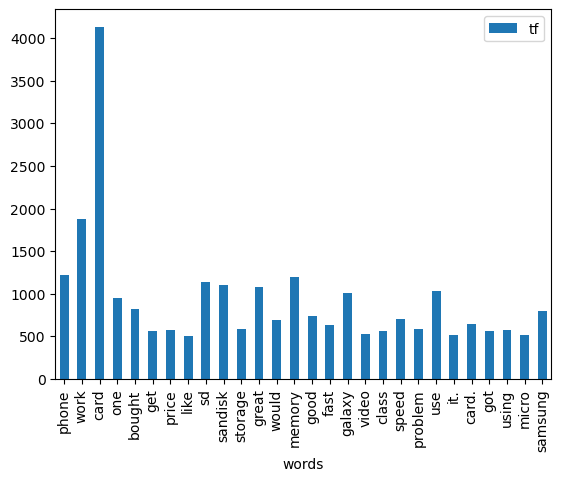

In [53]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

### Wordcloud
***Definition:*** It is a form of creating a cloud-shaped visual according to the frequency of words in the relevant text.

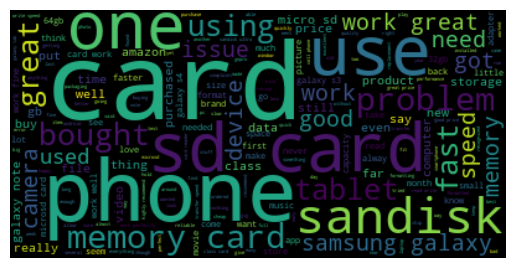

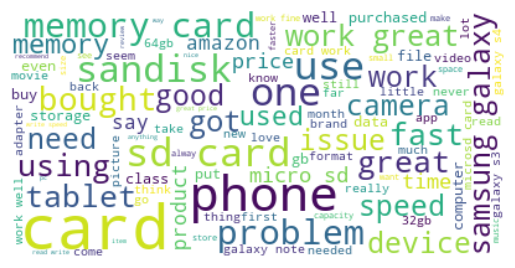

In [54]:
text = " ".join(i for i in df.reviewText)

wordcloud = WordCloud().generate(text) # WordCloud() object class

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#------------------------------------------------------------

wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

### Wordcloud According to Schemes
Visualizing the created word cloud by using the available images as background.

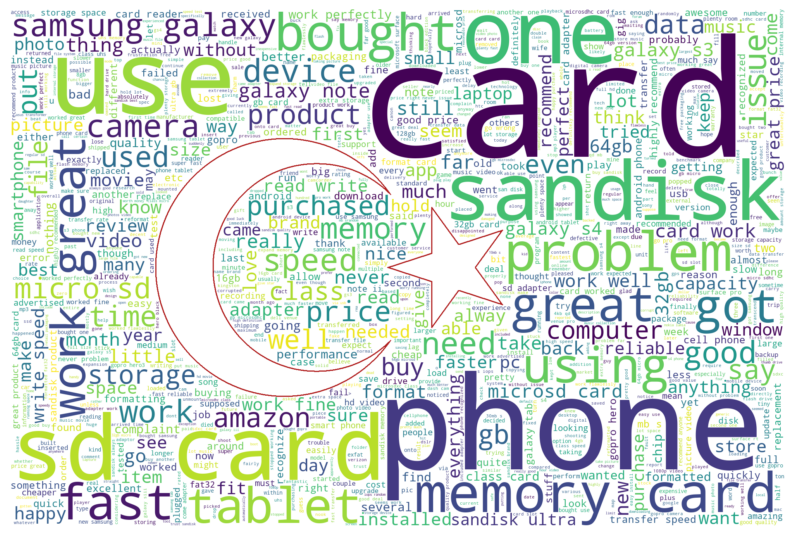

In [55]:
tr_mask = np.array(Image.open("tr.png"))

wc = WordCloud(background_color="white",
               max_words=1000,
               mask=tr_mask,
               contour_width=3,
               contour_color="firebrick")

wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3) Sentiment Analysis
***NOTE_1: It aims to mathematically express the emotional states of the texts we have..*** <br>
**NOTE_2: Product/brand comparison, competitor analysis, etc. can be made with sentiment analysis.** <br>

In [57]:
# df["reviewText"].head()
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

sia.polarity_scores("The film was awesome")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

**IMPORTANT: By tagging comments with SentimentIntensityAnalyzer(), the dependent variable for the comment classification machine learning model
has been created.**

In [63]:
sia.polarity_scores("I liked this music but it is not good as the other one")
# "compound" should be taken into account and varies between (-1,1). Greater than 0 indicates positive emotion.

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [64]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...
3    {'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...
4    {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.055, 'neu': 0.633, 'pos': 0.312, 'co...
7    {'neg': 0.045, 'neu': 0.675, 'pos': 0.28, 'com...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...
Name: reviewText, dtype: object

In [65]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.91
7   0.81
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [66]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

## 4. Feature Engineering

In [67]:
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

***NOTE: polarity_scores --> score that indicating whether each sentence is positive or negative***<br>

In [76]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
# The problem is transformed from unsupervised type to supervised type by classification labeling.

In [77]:
df["sentiment_label"].value_counts()

sentiment_label
pos    3932
neg     983
Name: count, dtype: int64

In [78]:
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.11
pos   4.71
Name: overall, dtype: float64

In [81]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"]) # neg => 0; pos => 1

y = df["sentiment_label"]
X = df["reviewText"]

### Count Vectors

In [102]:
# Count Vectors: frequency representations --> It can be done separately according to a,b,c methods.
# TF-IDF Vectors:normalized frequency representations --> It can be done separately according to a,b,c methods.
# Word Embeddings (Word2Vec, GloVe, BERT vs) --> It can be done separately according to a,b,c methods.

In [80]:
# a.words
# numerical representations of words

# b.characters
# numerical representations of characters

# c.ngram
a = """Bu örneği anlaşılabilmesi için daha uzun bir metin üzerinden göstereceğim.
N-gram'lar birlikte kullanılan kelimelerin kombinasyolarını gösterir ve feature üretmek için kullanılır"""

TextBlob(a).ngrams(3)

[WordList(['Bu', 'örneği', 'anlaşılabilmesi']),
 WordList(['örneği', 'anlaşılabilmesi', 'için']),
 WordList(['anlaşılabilmesi', 'için', 'daha']),
 WordList(['için', 'daha', 'uzun']),
 WordList(['daha', 'uzun', 'bir']),
 WordList(['uzun', 'bir', 'metin']),
 WordList(['bir', 'metin', 'üzerinden']),
 WordList(['metin', 'üzerinden', 'göstereceğim']),
 WordList(['üzerinden', 'göstereceğim', "N-gram'lar"]),
 WordList(['göstereceğim', "N-gram'lar", 'birlikte']),
 WordList(["N-gram'lar", 'birlikte', 'kullanılan']),
 WordList(['birlikte', 'kullanılan', 'kelimelerin']),
 WordList(['kullanılan', 'kelimelerin', 'kombinasyolarını']),
 WordList(['kelimelerin', 'kombinasyolarını', 'gösterir']),
 WordList(['kombinasyolarını', 'gösterir', 've']),
 WordList(['gösterir', 've', 'feature']),
 WordList(['ve', 'feature', 'üretmek']),
 WordList(['feature', 'üretmek', 'için']),
 WordList(['üretmek', 'için', 'kullanılır'])]

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document.', # 1.tweet/comment etc
          'This document is the second document.', # 2.tweet/comment etc
          'And this is the third one.', # 3.tweet/comment etc
          'Is this the first document?'] # 4.tweet/comment etc

# word frekans
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [95]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [103]:
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this'] every word here that
# I go to the frequency information of the number of times it occurs in each string/text element in the "corpus"

In [96]:
# n-gram frequency
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [97]:
vectorizer2.get_feature_names_out()

array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [104]:
#['and this', 'document is', 'first document', 'is the', 'is this', 'second document', 'the first', 'the second', 'the third',
# 'third one', 'this document', 'this is', 'this the'] =>  Here we go to the frequency information of how many times each phrase occurs in each string/text element in the "corpus".

In [106]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names_out()[10:15]
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [109]:
vectorizer.get_feature_names_out()[5:20]

array(['100', '1000', '100mb', '1024', '1080', '1080p', '10gb', '10mb',
       '11', '119', '119gb', '12', '120', '128', '128gb'], dtype=object)

### TF-IDF (Term Frequency – Inverse Document Frequency)
It is a normalized, standardized word vector creation method to avoid some biases that the Count Vector method may introduce.
 <br>**Word Vector Creation** is the most critical part of NLP.

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [100]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

## 5) Sentiment Modeling

### Logistic Regression

In [110]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.8284842319430314

In [111]:
# new_review = pd.Series("this product is great")
# new_review = pd.Series("look at that shit very bad")
new_review = pd.Series("it was good but I am sure that it fits me")

new_review = TfidfVectorizer().fit(X).transform(new_review)

log_model.predict(new_review)

array([1], dtype=int64)

In [115]:
random_review = pd.Series(df["reviewText"].sample(1).values)
print(random_review)

new_review2 = TfidfVectorizer().fit(X).transform(random_review)

log_model.predict(new_review2)

0    self favor get memory fancy new phone.i taken ...
dtype: object


array([1], dtype=int64)

### Random Forest 

In [116]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.8459816887080367

In [117]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8299084435401831

In [118]:
# TF-IDF N-GRAM
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.7816887080366226

### Hyperparameter Optimization

In [119]:
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"], # Maximum number of variables to be considered in splits
             "min_samples_split": [2, 5, 8], # parameter that decides how many samples should be on a sheet
             "n_estimators": [100, 200]} # Parameter indicating how many trees will be fit

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

rf_best_grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 200}

In [120]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.8113936927772126